### Dataset Information

This dataset is from a 2014 survey that measures attitudes towards mental health and frequency of mental health disorders in the tech workplace.

<b>Content</b>

- Timestamp
- Age
- Gender
- Country
- state: If you live in the United States, which state or territory do you live in?
- self_employed: Are you self-employed?
- family_history: Do you have a family history of mental illness?
- treatment: Have you sought treatment for a mental health condition?
- work_interfere: If you have a mental health condition, do you feel that it interferes with your work?
- no_employees: How many employees does your company or organization have?
- remote_work: Do you work remotely (outside of an office) at least 50% of the time?
- tech_company: Is your employer primarily a tech company/organization?
- benefits: Does your employer provide mental health benefits?
- care_options: Do you know the options for mental health care your employer provides?
- wellness_program: Has your employer ever discussed mental health as part of an employee wellness program?
- seek_help: Does your employer provide resources to learn more about mental health issues and how to seek help?
- anonymity: Is your anonymity protected if you choose to take advantage of mental health or substance abuse treatment resources?
- leave: How easy is it for you to take medical leave for a mental health condition?
- mental_health_consequence: Do you think that discussing a mental health issue with your employer would have negative consequences?
- phys_health_consequence: Do you think that discussing a physical health issue with your employer would have negative consequences?
- coworkers: Would you be willing to discuss a mental health issue with your coworkers?
- supervisor: Would you be willing to discuss a mental health issue with your direct supervisor(s)?
- mental_health_interview: Would you bring up a mental health issue with a potential employer in an interview?
- phys_health_interview: Would you bring up a physical health issue with a potential employer in an interview?
- mental_vs_physical: Do you feel that your employer takes mental health as seriously as physical health?
- obs_consequence: Have you heard of or observed negative consequences for coworkers with mental health conditions in your workplace?
- comments: Any additional notes or comments

Ideas
- How attitudes towards mental health vary by gender?
       ['Gender', 'treatment', 'mental_health_consequence', 'coworkers',
       'supervisor', 'mental_health_interview', 'mental_vs_physical']

- How attitudes towards mental health vary by size of company, age?

### Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Importing dataset
tech = pd.read_csv('survey.csv')

In [3]:
tech.shape

(1259, 27)

In [4]:
tech.columns

Index(['Timestamp', 'Age', 'Gender', 'Country', 'state', 'self_employed',
       'family_history', 'treatment', 'work_interfere', 'no_employees',
       'remote_work', 'tech_company', 'benefits', 'care_options',
       'wellness_program', 'seek_help', 'anonymity', 'leave',
       'mental_health_consequence', 'phys_health_consequence', 'coworkers',
       'supervisor', 'mental_health_interview', 'phys_health_interview',
       'mental_vs_physical', 'obs_consequence', 'comments'],
      dtype='object')

In [5]:
# Clean gender
tech['Gender'] = [x.lower().replace('cis','').strip() for x in tech['Gender']]

# find male gender
male = ['m', 'male', 'male-ish', 'maile', 'mal', 'male ()', 'make',
       'guy (-ish) ^_^', 'man', 'msle', 'mail', 'malr', 'ostensibly male, unsure what that really means']
male_clean = {x: 'male' for x in male}

# find female gender
female = ['female', 'f', 'woman', 'femake', 'female ()', 'femail']

female_clean = {x: 'female' for x in female}

# map male and female
gender_clean = {**male_clean , **female_clean}
tech['Gender'] = tech['Gender'].map(gender_clean)

# fill nulls with other
tech['Gender'] = tech['Gender'].fillna('other')

# value counts
tech['Gender'].value_counts()

male      993
female    246
other      20
Name: Gender, dtype: int64

Unbalanced population between men and women - use relative number

In [6]:
# select columns
gender_att = tech[['Gender', 'treatment', 'mental_health_consequence', 'coworkers', 
                  'supervisor', 'mental_health_interview', 'mental_vs_physical']]

gender_att

,Gender,treatment,mental_health_consequence,coworkers,supervisor,mental_health_interview,mental_vs_physical
0,female,Yes,No,Some of them,Yes,No,Yes
1,male,No,Maybe,No,No,No,Don't know
2,male,No,No,Yes,Yes,Yes,No
3,male,Yes,Yes,Some of them,No,Maybe,No
4,male,No,No,Some of them,Yes,Yes,Don't know
...,...,...,...,...,...,...,...
1254,male,Yes,No,Some of them,Some of them,No,Don't know
1255,male,Yes,No,Some of them,Yes,No,Yes
1256,male,Yes,Yes,No,No,No,No
1257,female,No,Yes,No,No,No,No


In [7]:
male_att = gender_att.loc[gender_att['Gender'] == 'male']
female_att = gender_att.loc[gender_att['Gender'] == 'female']
other_att = gender_att.loc[gender_att['Gender'] == 'other']

### Crosstabs

In [8]:
# Gender and treatment
crosstab_treatment = pd.crosstab(index=gender_att["Gender"], columns=gender_att['treatment'], normalize='index')
crosstab_treatment

treatment,No,Yes
Gender,,
female,0.313008,0.686992
male,0.544814,0.455186
other,0.200000,0.800000


- 67 % of women have taken mental health treatment 
- 45 % of men have taken mental health treatment
- 80% of the "other" have taken mental health treatment

In [9]:
# Gender and mental_health_consequence - Do you think that discussing a mental health issue with your employer would have negative consequences?
crosstab_mental_health_consequence = pd.crosstab(index=gender_att["Gender"], columns=gender_att['mental_health_consequence'], normalize='index')
crosstab_mental_health_consequence

mental_health_consequence,Maybe,No,Yes
Gender,,,
female,0.439024,0.292683,0.268293
male,0.366566,0.415911,0.217523
other,0.250000,0.250000,0.500000


- Women: 43% think that discussing a mental health issue with their employer might have negative consequences, 23% don't think so and 27% yes.
- Men: 37% think that discussing a mental health issue with their employer might have negative consequences, 42% don't think so and 22% yes.

In [10]:
# Gender and coworkers
crosstab_coworkers = pd.crosstab(index=gender_att["Gender"], columns=gender_att['coworkers'],normalize='index')
crosstab_coworkers

coworkers,No,Some of them,Yes
Gender,,,
female,0.235772,0.630081,0.134146
male,0.199396,0.614300,0.186304
other,0.200000,0.450000,0.350000


- The majority of men (61%) and women (63%) think that it depends on the coworkers. More men will be willing to talk to a coworker (18% against 13% of women)

In [11]:
# Gender and supervisor
crosstab_supervisor = pd.crosstab(index=gender_att["Gender"], columns=gender_att['supervisor'], normalize='index')
crosstab_supervisor

supervisor,No,Some of them,Yes
Gender,,,
female,0.349593,0.345528,0.304878
male,0.304129,0.258812,0.437059
other,0.250000,0.400000,0.350000


- Men seem more confortable talking about mental health issues with there supervisor (43% against 30% of women)

In [20]:
# Gender and mental_health_interview
crosstab_mental_health_interview = pd.crosstab(index=gender_att["Gender"], columns=gender_att['mental_health_interview'], normalize='index')
crosstab_mental_health_interview

mental_health_interview,Maybe,No,Yes
Gender,,,
female,0.085366,0.906504,0.008130
male,0.185297,0.778449,0.036254
other,0.100000,0.600000,0.300000


- Women: the high majority (90%) won't mention a mental health issue during an interview, 8% will maybe mention it and not even 1% will mention it.
- Men: the majority (77%) won't mention a mental health issue during an interview, 2% will maybe mention it and not even 3% will mention it.

- It seems that men are more confortable with mental health issue in the work environment than women

In [13]:
# Gender and mental_vs_physical
crosstab_mental_vs_physical = pd.crosstab(index=gender_att["Gender"], columns=gender_att['mental_vs_physical'], normalize='index')
crosstab_mental_vs_physical

mental_vs_physical,Don't know,No,Yes
Gender,,,
female,0.443089,0.264228,0.292683
male,0.468278,0.267875,0.263847
other,0.100000,0.450000,0.450000


- For both women and men, the majority doesn't know.

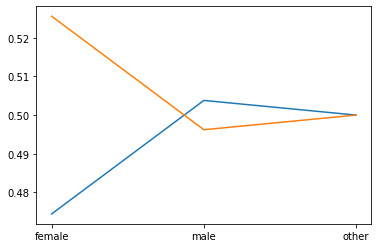

In [19]:
# Gender and mental_vs_physical without "Don't know"
gender_att['mental_vs_physical'].replace("Don't know", np.nan, inplace=True)

crosstab_mental_vs_physical = pd.crosstab(index=gender_att["Gender"], columns=gender_att['mental_vs_physical'], normalize='index')
crosstab_mental_vs_physical.columns = [['Yes', 'No']]
crosstab_mental_vs_physical

plt.plot(crosstab_mental_vs_physical)

Without the "Don't know" answer: 
- for men it's really close 50/50
- for women it's a little more spread out with a majority for No